# Scraping Dataset

In [ ]:
!pip install google-play-scraper

In [ ]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

In [ ]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews_all, Sort

# Mengambil semua ulasan dari aplikasi dengan ID 'com.nudi.bkn.sapk' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.nudi.bkn.sapk',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=1000            # Jumlah maksimum ulasan yang ingin diambil
)

In [ ]:
# Menyimpan ulasan dalam file CSV
import csv

with open('ulasan_myasn.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

# Loading Dataset

In [ ]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('/content/drive/MyDrive/Kuliah/Semester 6/Penelitian Ilmiah/Analisis Sentimen/Sentimen Aplikasi/ulasan_aplikasi.csv', index=False) # upload ke gdrive

# Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kuliah/Semester 6/Penelitian Ilmiah/Analisis Sentimen/Sentimen Aplikasi/ulasan_myasn.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,23bc75e9-1a55-4744-99bf-88ab4d61d3cf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Login dengan NIP dan password sudah benar tapi...,2,31,3.2.0,2025-02-14 06:30:39,NaN,NaN,3.2.0
1,8d90ad3a-297a-4fcf-98ab-d907f29bc55d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ternyata melalui my ASN gk bs diharap. buat te...,1,2,3.2.0,2025-04-10 05:57:59,NaN,NaN,3.2.0
2,0fa42cb7-f51c-4e02-96c3-abb8429fd96c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Egak usah buat aplikasi kalo belum sempurna Su...,1,20,3.1.8,2025-03-12 02:23:57,NaN,NaN,3.1.8
3,848c531a-74dd-45d1-81d0-a7115179925d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tidak bisa mengupdate riwayat keluarga. Sudah ...,1,4,3.2.0,2025-03-17 02:38:18,NaN,NaN,3.2.0
4,b791722b-396b-4e90-9eb5-67bda0e696fe,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong diperbaiki, setelah Update Aplikasi ken...",1,111,3.1.8,2025-02-03 22:59:38,NaN,NaN,3.1.8
...,...,...,...,...,...,...,...,...,...,...,...
7061,e9c88588-dbae-4589-a259-f4c186415ca0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,💩💩💩💩,1,0,NaN,2021-09-14 08:16:44,NaN,NaN,NaN
7062,01cc3519-0a10-4332-bb60-24b2991a0b2f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,😟,1,0,NaN,2019-10-07 15:16:53,NaN,NaN,NaN
7063,467486e2-5bb4-4d82-89af-38020c80cb11,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,😶,1,0,NaN,2021-09-22 23:08:49,NaN,NaN,NaN
7064,e6744483-b384-442e-b994-d46b8bc24517,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👎👎👎👎👎,1,0,NaN,2019-12-31 04:07:01,NaN,NaN,NaN


# 1. Cleaning Data

In [ ]:
df = df[['content', 'score']]
df

,content,score
0,Login dengan NIP dan password sudah benar tapi...,2
1,Ternyata melalui my ASN gk bs diharap. buat te...,1
2,Egak usah buat aplikasi kalo belum sempurna Su...,1
3,Tidak bisa mengupdate riwayat keluarga. Sudah ...,1
4,"Tolong diperbaiki, setelah Update Aplikasi ken...",1
...,...,...
7061,💩💩💩💩,1
7062,😟,1
7063,😶,1
7064,👎👎👎👎👎,1


In [ ]:
df.shape

(7066, 2)

In [ ]:
df = df.drop_duplicates(subset='content')
df

,content,score
0,Login dengan NIP dan password sudah benar tapi...,2
1,Ternyata melalui my ASN gk bs diharap. buat te...,1
2,Egak usah buat aplikasi kalo belum sempurna Su...,1
3,Tidak bisa mengupdate riwayat keluarga. Sudah ...,1
4,"Tolong diperbaiki, setelah Update Aplikasi ken...",1
...,...,...
7061,💩💩💩💩,1
7062,😟,1
7063,😶,1
7064,👎👎👎👎👎,1


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(5337, 2)

In [ ]:
def clean_myasn_data(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)

    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['content'] = df['content'].apply(clean_myasn_data)

# 2. Preprocessing

In [ ]:
score = df['score']

In [ ]:
df['content'] = df['content'].str.lower()

In [ ]:
df.head()

,content,score
0,login dengan nip dan password sudah benar tapi...,2
1,ternyata melalui my asn gk bs diharap buat tem...,1
2,egak usah buat aplikasi kalo belum sempurna su...,1
3,tidak bisa mengupdate riwayat keluarga sudah b...,1
4,tolong diperbaiki setelah update aplikasi kena...,1


In [ ]:
def filter_tokens_by_length(dataframe, column, min_words, max_words):
    words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
    mask = (words_count >= min_words) & (words_count <= max_words)
    filtered_df = dataframe[mask]
    return filtered_df

min_words = 3
max_words = 50

df = filter_tokens_by_length(df, 'content', min_words, max_words)

In [ ]:
# Normalisasi
norm = {
" yg ": " yang ",
" gak ": " tidak ",
" ga ": " tidak ",
" ok ": " oke ",
" bkn ": " bukan ",
" tdk ": " tidak ",
" sdh ": " sudah ",
" aja ": " saja ",
" tp ": " tapi ",
" apk ": " aplikasi ",
" hp ": " handphone ",
" asn ": " Aparatur Sipil Negara ",
" nip ": " Nomor Induk Pegawai ",
" pns ": " Pegawai Negeri Sipil "

}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

df['content'] = df['content'].apply(lambda x: stopword(x))

In [ ]:
# Tokenize
tokenized = df['content'].apply(lambda x: x.split())
tokenized

,content
0,"[login, Nomor, Induk, Pegawai, password, benar..."
2,"[egak, usah, buat, aplikasi, kalo, sempurna, s..."
3,"[bisa, mengupdate, riwayat, keluarga, berhasil..."
4,"[diperbaiki, update, aplikasi, saat, mau, log,..."
5,"[kocak, login, lewat, web, masuk, update, prof..."
...,...
6539,"[aplikasi, sangat, membantu]"
6540,"[data, hrs, valid]"
6981,"[the, best, application]"
6982,"[kiki, vr, kiki, vr]"


In [ ]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)
tokenized.to_csv('/content/drive/MyDrive/Kuliah/Semester 6/Penelitian Ilmiah/Analisis Sentimen/Sentimen Aplikasi/Preprocessingmyasn.csv', index=False)

login nomor induk pegawai password benar terang malah nomor induk pegawai ada data terus login lewat crome malah muncul data orang ini gimana kok bisa bukak data lewat aplikasi myasn bkn
egak usah buat aplikasi kalo sempurna bulan login lalu aplikasi login lalu chrome bisa ayo jangan terlalu lama updatenya kena hajad hidup orang banyak bro
bisa mengupdate riwayat keluarga hasil menginput pada riwayat aju ada data
baik update aplikasi saat mau log in muncul notif nomor induk pegawai ada basis data di update tak ad masalah
kocak login lewat web masuk update profil gilir lewat app malah nomor induk pegawai tidak ada database anggar development bukan main hasil app nya main2 wkwkwk
hendak ikut atur terap perintah harus update data lewat aplikasi myasn selalu kendala server buat bidang kait baik aplikasi tidak susah yang hendak ikut atur
update aplikasi masa pas login nomor induk pegawai data database sedangakan login web bisa
percuma update data keluarga tak laku harap baik buat apa dilaun

In [ ]:
tokenized

,content
0,login nomor induk pegawai password benar teran...
2,egak usah buat aplikasi kalo sempurna bulan lo...
3,bisa mengupdate riwayat keluarga hasil menginp...
4,baik update aplikasi saat mau log in muncul no...
5,kocak login lewat web masuk update profil gili...
...,...
6539,aplikasi sangat bantu
6540,data hrs valid
6981,the best application
6982,kiki vr kiki vr


In [ ]:
score

,score
0,2
1,1
2,1
3,1
4,1
...,...
7061,1
7062,1
7063,1
7064,1


In [ ]:
# Menggabungkan kedua DataFrame berdasarkan index
score.drop(columns=['Unnamed=0'], inplace=True)
df = pd.concat([tokenized, score], axis=1)
df.head()

,content,score
0,login nomor induk pegawai password benar teran...,2
2,egak usah buat aplikasi kalo sempurna bulan lo...,1
3,bisa mengupdate riwayat keluarga hasil menginp...,1
4,baik update aplikasi saat mau log in muncul no...,1
5,kocak login lewat web masuk update profil gili...,1


# 3. Labeling

In [ ]:
def label_sentiment(score):
    if score <= 2:
        return 'negatif'
    # elif score == 3:
    #     return 'netral'
    else:
        return 'positif'

df['sentimen'] = df['score'].apply(label_sentiment)

In [ ]:
df.head()

,content,score,sentimen
0,login nomor induk pegawai password benar teran...,2,negatif
2,egak usah buat aplikasi kalo sempurna bulan lo...,1,negatif
3,bisa mengupdate riwayat keluarga hasil menginp...,1,negatif
4,baik update aplikasi saat mau log in muncul no...,1,negatif
5,kocak login lewat web masuk update profil gili...,1,negatif


In [ ]:
sentimen_counts = df.sentimen.value_counts()
sentimen_counts

,count
sentimen,
negatif,2714
positif,2623


# 4. Visualization

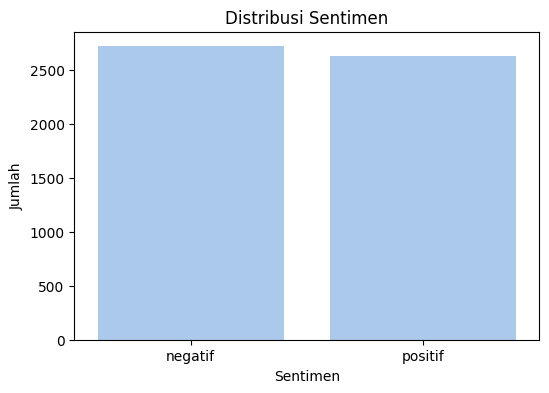

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Visualisasi
sns.set_palette("pastel")
plt.figure(figsize=(6, 4))
sns.countplot(x='sentimen', data=df)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
data_negatif = df[df['sentimen'] == 'negatif']
data_positif = df[df['sentimen'] == 'positif']

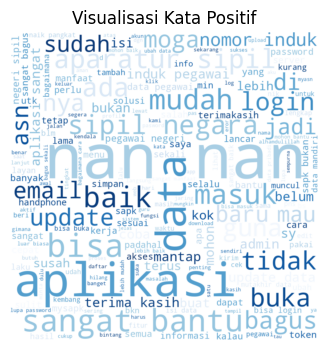

In [ ]:
all_text_s1 = ' '.join(str(word) for word in data_positif["content"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

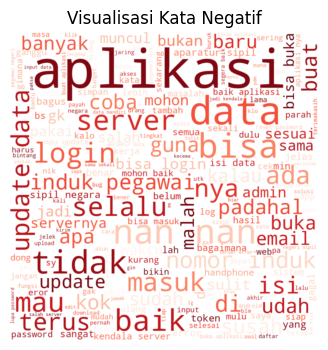

In [ ]:
all_text_s0 = ' '.join(str(word) for word in data_negatif["content"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

# 5. Splitting Data

In [ ]:
X=df.content
y=df.sentimen

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 4269
Banyak data x_test  : 1068
Banyak data y_train : 4269
Banyak data y_test  : 1068


# 6. Training Data (SVM, Naive Bayes, Random Forest)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf1 = SVC(kernel="linear")
clf2 = MultinomialNB()
clf3 = RandomForestClassifier()

In [ ]:
from sklearn.pipeline import Pipeline

model1 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])
model2 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])
model3 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])

In [ ]:
# Before fitting the model, impute or remove NaN values from x_train
x_train = x_train.fillna('')  # Replace NaN with empty strings
# or
x_train = x_train.dropna()  # Remove rows with NaN values

# Now fit the model
model1.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [ ]:
# Before prediction, impute or remove NaN values from x_test
x_test = x_test.fillna('')  # Replace NaN with empty strings
# or
x_test = x_test.dropna()  # Remove rows with NaN values

hasil1 = model1.predict(x_test)  # Now predict with the cleaned x_test

In [ ]:
matrix = classification_report(y_test,hasil1)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.77      0.72      0.74       551
     positif       0.72      0.77      0.74       517

    accuracy                           0.74      1068
   macro avg       0.74      0.74      0.74      1068
weighted avg       0.74      0.74      0.74      1068



In [ ]:
model2.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [ ]:
hasil2=model2.predict(x_test)

In [ ]:
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.62      0.90      0.73       551
     positif       0.79      0.42      0.55       517

    accuracy                           0.66      1068
   macro avg       0.71      0.66      0.64      1068
weighted avg       0.70      0.66      0.64      1068



In [ ]:
model3.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
hasil3=model3.predict(x_test)

In [ ]:
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     negatif       0.76      0.77      0.76       551
     positif       0.75      0.73      0.74       517

    accuracy                           0.75      1068
   macro avg       0.75      0.75      0.75      1068
weighted avg       0.75      0.75      0.75      1068



In [ ]:
hasilDecisionTreeClassifier = accuracy_score(hasil1, y_test)
precision1 = precision_score(y_test, hasil1, average='weighted')
recall1 = recall_score(y_test, hasil1, average='weighted')
f1_1 = f1_score(y_test, hasil1, average='weighted')

hasilMultinomialNB = accuracy_score(hasil2, y_test)
precision2 = precision_score(y_test, hasil2, average='weighted')
recall2 = recall_score(y_test, hasil2, average='weighted')
f1_2 = f1_score(y_test, hasil2, average='weighted')

hasilRandomForestClassifier = accuracy_score(hasil3, y_test)
precision3 = precision_score(y_test, hasil3, average='weighted')
recall3 = recall_score(y_test, hasil3, average='weighted')
f1_3 = f1_score(y_test, hasil3, average='weighted')

In [ ]:
model = {'Model':['Decision Tree Classifier',
                  'Multinomial Naive Bayes',
                  'Random Forest Classifier',
                 ],
         'AccuracyScore':[hasilDecisionTreeClassifier, hasilMultinomialNB, hasilRandomForestClassifier],
         'Precision':[precision1, precision2, precision3],
         'Recall':[recall1, recall2, recall3],
         'F1-Score':[f1_1, f1_2, f1_3]
         }
model_df = pd.DataFrame(model)
model_df

,Model,AccuracyScore,Precision,Recall,F1-Score
0,Decision Tree Classifier,0.740637,0.742367,0.740637,0.740611
1,Multinomial Naive Bayes,0.664794,0.704476,0.664794,0.643058
2,Random Forest Classifier,0.753745,0.753705,0.753745,0.753613


# 7. Testing

In [ ]:
def classify_text(input_text):
    models = [
        ('DecisionTreeClassifier', model_decisionTree),
        ('MultinomialNB', model_multinomialNaiveBayes),
        ('RandomForestClassifier', model_randomForest)
    ]

    results = {}

    for name, model in models:
        prediction = model.predict([input_text])
        results[name] = prediction[0]

    return results

In [ ]:
model_decisionTree = model1.fit(x_train, y_train)
model_multinomialNaiveBayes = model2.fit(x_train, y_train)
model_randomForest = model3.fit(x_train, y_train)

In [ ]:
input_text = input("Masukkan teks yang ingin diklasifikasikan: ")

results = classify_text(input_text)

print("Input kata :", input_text)

print("\nHasil Klasifikasi:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")

Masukkan teks yang ingin diklasifikasikan: kalo gabisa bikin aplikasi mending jangan bikin deh
Input kata : kalo gabisa bikin aplikasi mending jangan bikin deh

Hasil Klasifikasi:
DecisionTreeClassifier: negatif
MultinomialNB: negatif
RandomForestClassifier: negatif
